In [3]:
import requests
from bs4 import BeautifulSoup

In [38]:
url = 'https://www.tradingview.com/markets/stocks-usa/market-movers-most-volatile/' # Most volatile US Stocks
response = requests.get(url)
response

<Response [200]>

In [39]:
soup = BeautifulSoup(response.text, 'lxml')

In [113]:
stock_info = []
temp = soup.select('tbody tr td')
for i in temp:
    stock_info.append(i.text)

symbol = stock_info[0::13]
volatility = stock_info[1::13]

In [143]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(data = volatility, index=symbol)
df.rename(columns={0:'Volatility'}, inplace=True)
df

,Volatility
"SEELSeelos Therapeutics, Inc.",149.67%
"GWAVGreenwave Technology Solutions, Inc.",143.63%
"OTRKOntrak, Inc.",127.98%
"ZZCARZoomcar Holdings, Inc.",96.63%
SPRCSciSparc Ltd.,96.22%
...,...
WGSGeneDx Holdings Corp.,25.13%
"AAGEAgeX Therapeutics, Inc.",25.02%
SSELXSemilux International Ltd.,24.86%
"VGASVerde Clean Fuels, Inc.",24.78%


Text(0.5, 0, 'Symbol')

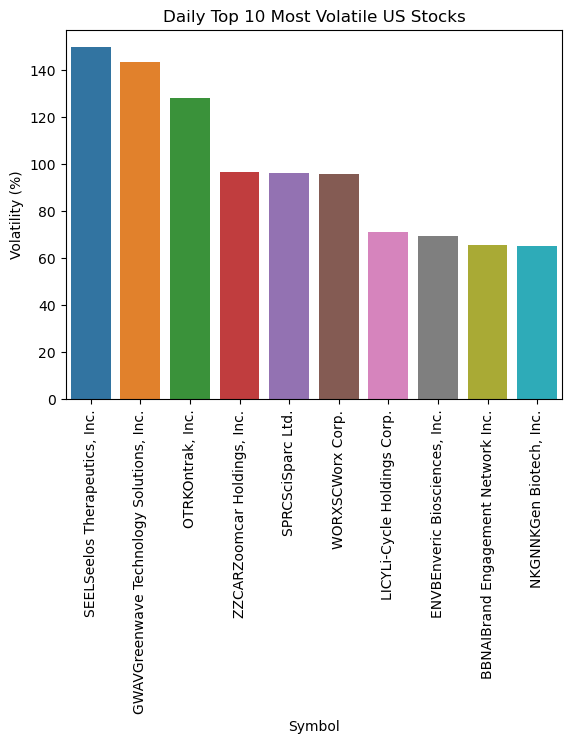

In [184]:
# Volatility is not numeric
# df['Volatility']= df['Volatility'].str.rstrip('%').astype(float) -- DONE
import matplotlib.pyplot as plt

top_10_rows = df.nlargest(10, 'Volatility')
plt.xticks(rotation=90)
plt.title('Daily Top 10 Most Volatile US Stocks')
sns.barplot(data=top_10_rows, x=top_10_rows.index, y='Volatility')
plt.ylabel('Volatility (%)')
plt.xlabel('Symbol')